In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Median Income
Y2018 = pd.read_csv('./median income/2018_med_income.csv')
Y2018 = Y2018.set_index(Y2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2017 = pd.read_csv('./median income/2017_med_income.csv')
Y2017 = Y2017.set_index(Y2017['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2016 = pd.read_csv('./median income/2016_med_income.csv')
Y2016 = Y2016.set_index(Y2016['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2015 = pd.read_csv('./median income/2015_med_income.csv')
Y2015 = Y2015.set_index(Y2015['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2014 = pd.read_csv('./median income/2014_med_income.csv')
Y2014 = Y2014.set_index(Y2014['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2013 = pd.read_csv('./median income/2013_med_income.csv')
Y2013 = Y2013.set_index(Y2013['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2012 = pd.read_csv('./median income/2012_med_income.csv')
Y2012 = Y2012.set_index(Y2012['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2011 = pd.read_csv('./median income/2011_med_income.csv')
Y2011 = Y2011.set_index(Y2011['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2010 = pd.read_csv('./median income/2010_med_income.csv')
Y2010 = Y2010.set_index(Y2010['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
lst = Y2010.index.tolist()
idx = lst.index('615.00')
lst[idx] = '615'
Y2010.index = lst

def get_avg_income(df):
    df = df.drop(df.columns[[-1,-2,-3,-4]], axis=1)
    df = df.set_index(df['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])

    household = df.iloc[:,2]
    household = household[household!='-']
    household = household[household!='(X)']
    return np.average(household.astype(float))

sf_median_income = [get_avg_income(Y2010),get_avg_income(Y2011),get_avg_income(Y2012),get_avg_income(Y2013),
                    get_avg_income(Y2014),get_avg_income(Y2015),get_avg_income(Y2016),get_avg_income(Y2017),
                    get_avg_income(Y2018)]

def get_tract_income(df,tract):
    return df.iloc[:,2][tract]


tracts = Y2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0]

In [20]:
#demographics
dem_2018 = pd.read_csv('./demographics/2018_demographic.csv')
dem_2018 = dem_2018.set_index(dem_2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2017 = pd.read_csv('./demographics/2017_demographic.csv')
dem_2017 = dem_2017.set_index(dem_2017['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2016 = pd.read_csv('./demographics/2016_demographic.csv')
dem_2016 = dem_2016.set_index(dem_2016['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2015 = pd.read_csv('./demographics/2015_demographic.csv')
dem_2015 = dem_2015.set_index(dem_2015['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2014 = pd.read_csv('./demographics/2014_demographic.csv')
dem_2014 = dem_2014.set_index(dem_2014['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2013 = pd.read_csv('./demographics/2013_demographic.csv')
dem_2013 = dem_2013.set_index(dem_2013['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2012 = pd.read_csv('./demographics/2012_demographic.csv')
dem_2012 = dem_2012.set_index(dem_2012['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2011 = pd.read_csv('./demographics/2011_demographic.csv')
dem_2011 = dem_2011.set_index(dem_2011['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2010 = pd.read_csv('./demographics/2010_demographic.csv')
dem_2010 = dem_2010.set_index(dem_2010['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
lst_dem = dem_2010.index.tolist()
idx = lst_dem.index('615.00')
lst_dem[idx] = '615'
dem_2010.index = lst_dem

def get_avg_demographics(df):
    white = df.iloc[:,4]/ df.iloc[:,2]
    return white.mean()

sf_white = [get_avg_demographics(dem_2010),get_avg_demographics(dem_2011),get_avg_demographics(dem_2012),
                  get_avg_demographics(dem_2013),get_avg_demographics(dem_2014),get_avg_demographics(dem_2015),
                  get_avg_demographics(dem_2016),get_avg_demographics(dem_2017),get_avg_demographics(dem_2018)]

def get_tract_demo(df,tract):
    return (df.iloc[:,4]/ df.iloc[:,2]).loc[tract]

In [21]:
def get_black_demographics(df):
    black = df.iloc[:,6]/ df.iloc[:,2]
    return black.mean()

def get_asian_demographics(df):
    asian = df.iloc[:,10]/ df.iloc[:,2]
    return asian.mean()

In [22]:
sf_black = [get_black_demographics(dem_2010),get_black_demographics(dem_2011),get_black_demographics(dem_2012),
                  get_black_demographics(dem_2013),get_black_demographics(dem_2014),get_black_demographics(dem_2015),
                  get_black_demographics(dem_2016),get_black_demographics(dem_2017),get_black_demographics(dem_2018)]
sf_asian = [get_asian_demographics(dem_2010),get_asian_demographics(dem_2011),get_asian_demographics(dem_2012),
                  get_asian_demographics(dem_2013),get_asian_demographics(dem_2014),get_asian_demographics(dem_2015),
                  get_asian_demographics(dem_2016),get_asian_demographics(dem_2017),get_asian_demographics(dem_2018)]


In [23]:
#housing price
housing = pd.read_csv('Effect - Housing Prices (Zillow).csv')
housing = housing.drop(['Metro','StateName','State','City','RegionType','CountyName'],axis=1)
dates = list(housing.columns[housing.columns.str.match('12/31/1[0-8]{1}')])
housing = housing[['RegionName']+dates]
sf_housing_prices = housing[dates].mean()

In [25]:
#Housing price II Mapping neighborhoods
sf_nhood = pd.read_csv('sf_neighborhoods')
new = []
for x in sf_nhood.NAME:
    if x%1==0:
        new += [str(int(x))]
        
    else:
        new += [str(x)]
        
sf_nhood['NAME']=new
sf_nhood = sf_nhood.set_index(sf_nhood.NAME)

In [73]:
#Data cleaning
sf_nhood.NHOOD.loc['328.01']='Parkside'
sf_nhood.NHOOD.loc['328.02']='Parkside'
sf_nhood.NHOOD.loc['329.01']='Parkside'
sf_nhood.NHOOD.loc['329.02']='Parkside'
sf_nhood.NHOOD.loc['329.02']='Parkside'
sf_nhood.NHOOD.loc['331']='Parkside'
sf_nhood.NHOOD.loc['330']='Parkside'
sf_nhood.NHOOD.loc['353']='Parkside'
sf_nhood.NHOOD.loc['354']='Parkside'

sf_nhood.NHOOD.loc['326.01']='Outer Sunset'
sf_nhood.NHOOD.loc['326.02']='Outer Sunset'
sf_nhood.NHOOD.loc['327']='Outer Sunset'
sf_nhood.NHOOD.loc['352.01']='Outer Sunset'
sf_nhood.NHOOD.loc['352.02']='Outer Sunset'
sf_nhood.NHOOD.loc['351']='Outer Sunset'

sf_nhood.NHOOD.loc['615']='South Beach'
sf_nhood.NHOOD.loc['105']='Financial District'
sf_nhood.NHOOD.loc['117']='Financial District'

sf_nhood.NHOOD.loc['612']='Bayview'
sf_nhood.NHOOD.loc['231.02']='Bayview'
sf_nhood.NHOOD.loc['232']='Bayview'
sf_nhood.NHOOD.loc['233']='Bayview'
sf_nhood.NHOOD.loc['234']='Bayview'
sf_nhood.NHOOD.loc['9809']='Bayview'
sf_nhood.NHOOD.loc['610']='Bayview'
sf_nhood.NHOOD.loc['230.03']='Bayview'
sf_nhood.NHOOD.loc['230.01']='Bayview'


sf_nhood.NHOOD.loc['231.03']='Hunters Point'
sf_nhood.NHOOD.loc['9806']='Hunters Point'

sf_nhood.NHOOD.loc['312.01']='Ingleside'
sf_nhood.NHOOD.loc['312.02']='Ingleside'
sf_nhood.NHOOD.loc['314']='Oceanview'
sf_nhood.NHOOD.loc['313.02']='Oceanview'
sf_nhood.NHOOD.loc['313.01']='Ingleside Heights'

sf_nhood.NHOOD.loc['305']='Midtown Terrace'
sf_nhood.NHOOD.loc['204.02']='Midtown Terrace'
sf_nhood.NHOOD.loc['310']='Westwood Highlands'
sf_nhood.NHOOD.loc['304']='Forest Hill'
sf_nhood.NHOOD.loc['306']='Forest Hill'
sf_nhood.NHOOD.loc['307']='Miraloma Park'
sf_nhood.NHOOD.loc['308']='St. Francis Wood'
sf_nhood.NHOOD.loc['309']='St. Francis Wood'
sf_nhood.NHOOD.loc['311']='Sunnyside'

# list(housing.RegionName).index("Oceanview")
housing.RegionName.iloc[43]='Castro/Upper Market'
housing.RegionName.iloc[26]='Oceanview'
housing.RegionName.iloc[38]='Haight Ashbury'
housing.RegionName.iloc[28]='Lone Mountain/USF'

common = sf_nhood[['NAME','NHOOD']].merge(housing,left_on='NHOOD',right_on='RegionName')
tract_housing_prices = common.set_index('NAME')[dates]


#Missing housing prices census tracts
set(tracts) - set(common.NAME)
common.to_csv('census_tract_housing_prices')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [167]:
tract_housing_prices.loc['122.01']
pca_per_tract('122.01')[8]-pca_per_tract('122.01')[0]


array([-273823.68067078])

In [28]:
#coffee shops
coffee = pd.read_csv('coffee_sf_filtered.csv')

In [29]:
#evictions
import datetime as dt
evictions = pd.read_csv('evictions.csv')
evictions = evictions.merge(sf_nhood[['TRACTCE','NAME']],left_on='TRACTCE',right_on='TRACTCE')

tract_evictions = evictions.groupby(['NAME','year']).size().unstack().fillna(0).iloc[:,:-2]
sf_evictions = tract_evictions.mean()

Text(0.5, 1.0, 'SF Gentrification index')

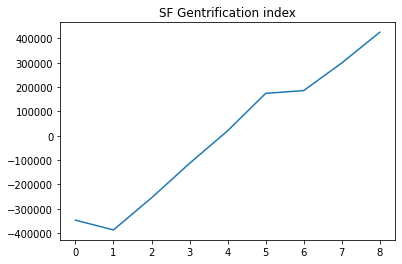

In [30]:
#Gentrification index for SF
from sklearn.decomposition import PCA

years=pd.Series([2010,2011,2012,2013,2014,2015,2016,2017,2018])

X = pd.DataFrame(sf_median_income)
X = X.rename(columns={0: 'median_income'})
X = X.set_index(years)
X['housing_prices']=list(sf_housing_prices)
X['evictions']=list(sf_evictions)
X['white']=sf_white
X

pca = PCA(n_components=1)
plt.plot(pca.fit_transform(X))
plt.title('SF Gentrification index')

In [39]:
#Gentrification index for all census tracts
tracts = Y2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0]

lst_df_incomes = [Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018]
lst_df_demo = [dem_2010,dem_2011,dem_2012,dem_2013,dem_2014,dem_2015,dem_2016,dem_2017,dem_2018]

def df_per_tract(tract_str):

    tract_med = [get_tract_income(x,tract_str) for x in lst_df_incomes]
    tract_white = [get_tract_demo(x,tract_str) for x in lst_df_demo]
    tract_house = list(tract_housing_prices.loc[tract_str])
    X = pd.DataFrame(zip(tract_med,tract_white,tract_house))
    try: 
        X['tract_eviction'] = list(tract_evictions.loc[tract_str])
    except:
        X = X
    return X

def pca_per_tract(tract_str):
    X = df_per_tract(tract_str)
    pca = PCA(n_components=1)
    y = pca.fit_transform(X)
    return y

results=[]
for x in tracts:
    try:
        results+= [pca_per_tract(x)]
    except:
        results+= [x]

## PCA percentage change

In [203]:
sf_change = pca.fit_transform(X)[8]-pca.fit_transform(X)[0]

idx=[]
diff=[]
for i in range(len(results)):
    if type(results[i])==str:
        idx=idx
    elif (results[i][8]-results[i][0] > sf_change):
        idx+=[i]
        diff +=[results[i][8]-results[i][0]]
        
diff = np.array([x[0]for x in diff])
i = diff.argsort()[-30:][::-1]
indices = np.array(idx)[i]

top_nhood = [tracts[x] for x in indices]
top_nhood

['154',
 '133',
 '428',
 '308',
 '309',
 '451',
 '401',
 '452',
 '402',
 '130',
 '129.01',
 '128',
 '165',
 '126.01',
 '127',
 '129.02',
 '157',
 '156',
 '126.02',
 '211',
 '214',
 '216',
 '213',
 '212',
 '215',
 '306',
 '304',
 '601',
 '310',
 '301.02']

,median_income,housing_prices,evictions,white
2010,75479.594872,8.867079e+05,4.557471,0.525295
2011,77017.235897,8.464859e+05,4.821839,0.522558
2012,77722.825641,9.782576e+05,5.258621,0.520223
2013,79621.487179,1.120125e+06,8.775862,0.518052
2014,81654.276923,1.253788e+06,6.758621,0.507977
2015,85014.005155,1.407596e+06,6.770115,0.501925
2016,91150.551546,1.418766e+06,11.281609,0.496916
2017,98637.082051,1.532014e+06,5.143678,0.487391
2018,107117.787565,1.658119e+06,4.068966,0.481338


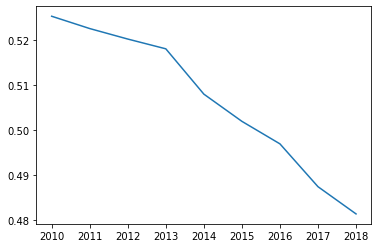

In [66]:
# plt.plot(X.iloc[:,0])
# # plt.plot(X.iloc[:,1])
# plt.plot(X.iloc[:,2])
plt.plot(X.iloc[:,3])
X

In [67]:
tract_str = '154'
# [get_tract_income(x,tract_str) for x in lst_df_incomes]
# [get_tract_demo(x,tract_str) for x in lst_df_demo]
list(tract_housing_prices.loc[tract_str])

# X = pd.DataFrame(zip(tract_med,tract_race,tract_house),columns=["tract_med",'tract_white','tract_house'])

# pca = PCA(n_components=1)
# y = pca.fit_transform(X)
# plt.plot(y)

[1950038,
 2026860,
 2375878,
 2795726,
 3151676,
 3425486,
 3413094,
 3778602,
 4444702]

([<matplotlib.axis.XTick at 0x122a55a58>,
 [Text(0, 0, '2010'),
  Text(0, 0, '2011'),
  Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016'),
  Text(0, 0, '2017'),
  Text(0, 0, '2018')])

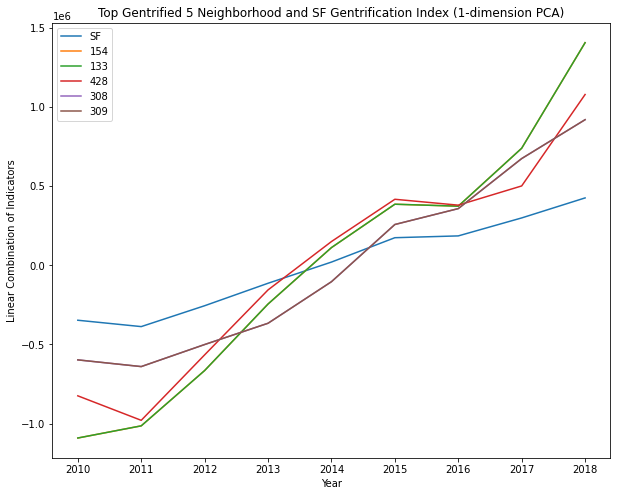

In [68]:
#154 overlaps 133, 308 overlaps 309
plt.figure(figsize=(10,8)) 

plt.plot(pca.fit_transform(X),label='SF')
plt.plot(pca_per_tract(top_nhood[0]),label=top_nhood[0])
plt.plot(pca_per_tract(top_nhood[1]),label=top_nhood[1])
plt.plot(pca_per_tract(top_nhood[2]),label=top_nhood[2])
plt.plot(pca_per_tract(top_nhood[3]),label=top_nhood[3])
plt.plot(pca_per_tract(top_nhood[4]),label=top_nhood[4])

plt.title("Top Gentrified 5 Neighborhood and SF Gentrification Index (1-dimension PCA)")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Linear Combination of Indicators')
plt.xticks(np.arange(9),labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
# plt.plot(pca_per_tract(neighborhoods_gentrified[0]))

Text(0.5, 0.98, 'Average of Indicators for all Census Tracts in SF Y2010-2018')

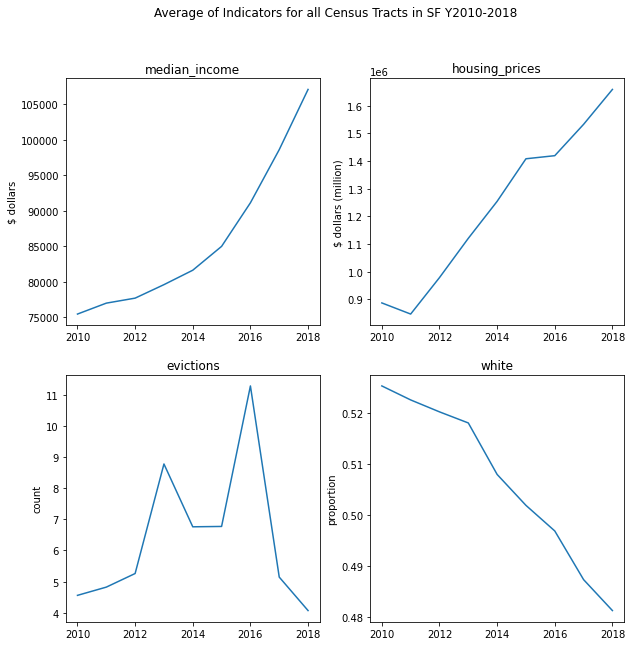

In [69]:
#sub plot for SF indicators

fig, axs = plt.subplots(2, 2,figsize=(10,10))


axs[0,0].plot(X['median_income'])
axs[0,0].set_title('median_income')
axs[0,0].set(ylabel='$ dollars')
axs[0,1].plot(X['housing_prices'])
axs[0,1].set_title('housing_prices')
axs[0,1].set(ylabel='$ dollars (million)')
axs[1,0].plot(X['evictions'])
axs[1,0].set_title('evictions')
axs[1,0].set(ylabel='count')
axs[1,1].plot(X['white'])
axs[1,1].set_title('white')
axs[1,1].set(ylabel='proportion')
fig.suptitle('Average of Indicators for all Census Tracts in SF Y2010-2018')

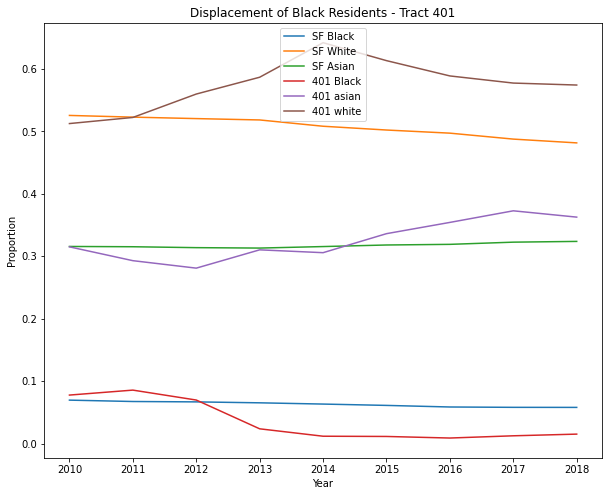

In [1651]:
plt.figure(figsize=(10,8)) 
black_401 = [(x.iloc[:,6]/x.iloc[:,2]).loc[top_nhood[6]]for x in lst_df_demo]
asian_401 = [(x.iloc[:,10]/x.iloc[:,2]).loc[top_nhood[6]]for x in lst_df_demo]
white_401 = [(x.iloc[:,4]/x.iloc[:,2]).loc[top_nhood[6]]for x in lst_df_demo]
plt.plot(sf_black,label = "SF Black")
plt.plot(sf_white,label='SF White')
plt.plot(sf_asian,label='SF Asian')
plt.plot(black_401,label='401 Black')
plt.plot(asian_401,label='401 asian')
plt.plot(white_401,label='401 white')
plt.title("Displacement of Black Residents - Tract 401")
plt.xticks(np.arange(9),labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()

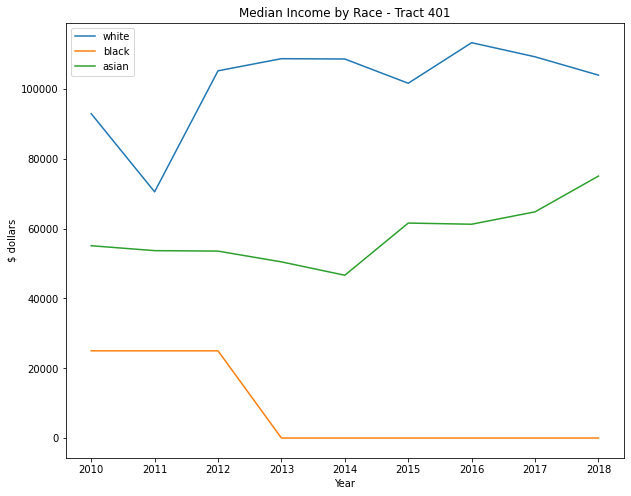

In [1671]:
#Median Income by race: white 3, black 4, asian 6, hispanic 10
white = [int(x.iloc[:,3].loc[top_nhood[6]]) for x in lst_df_incomes]
black = [x.iloc[:,4].loc[top_nhood[6]] for x in lst_df_incomes]
asian = [int(x.iloc[:,6].loc[top_nhood[6]]) for x in lst_df_incomes]
black = [int(x.replace('-','0').replace(',','')) for x in black]

plt.figure(figsize=(10,8)) 
plt.plot(white,label='white')
plt.plot(black,label='black')
plt.plot(asian,label='asian')
plt.title('Median Income by Race - Tract 401')
plt.xticks(np.arange(9),labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('$ dollars')
plt.xlabel('Year')
plt.legend()

In [1657]:
black

['2,5000', '2,5000', '2,5000', '0', '0', '0', '0', '0', '0']

In [1669]:
top_nhood

['154', '133', '428', '308', '309', '451', '401', '452', '402', '130']

In [150]:
pca

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [152]:
pd.read_csv('pca_result')

,name,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,101.00,286380.985628,340047.702884,174330.423364,42884.871786,-34944.399380,-152797.460472,-162664.523922,-243689.518542,-249548.081347
1,102.00,337158.426298,409680.567794,255869.222450,90471.441894,1324.803609,-201009.805142,-221498.669023,-286422.784545,-385573.203336
2,103.00,336431.509040,409314.018647,256093.534333,90736.852995,1622.969479,-200354.086280,-221530.600725,-286436.716785,-385877.480704
3,104.00,286743.042901,339929.406176,174926.242099,43033.491710,-34897.126973,-153124.565061,-163017.465315,-243573.437105,-250019.588432
4,105.00,219629.242399,281171.660206,85895.209232,-17394.332622,-70274.506822,-156967.563876,-99170.902626,-113929.830730,-128958.975161
...,...,...,...,...,...,...,...,...,...,...
192,9804.01,9804.010000,9804.010000,9804.010000,9804.010000,9804.010000,9804.010000,9804.010000,9804.010000,9804.010000
193,9805.01,9805.010000,9805.010000,9805.010000,9805.010000,9805.010000,9805.010000,9805.010000,9805.010000,9805.010000
194,9806.00,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000
195,9809.00,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000


In [201]:
black_0 = [(x.iloc[:,6]/x.iloc[:,2]).loc['307']for x in lst_df_demo]
asian_0 = [(x.iloc[:,10]/x.iloc[:,2]).loc['307']for x in lst_df_demo]
white_0 = [(x.iloc[:,4]/x.iloc[:,2]).loc['307']for x in lst_df_demo]

In [202]:
black_0

[0.010488364470665356,
 0.013688212927756654,
 0.015737410071942445,
 0.0058348294434470375,
 0.008979000724112961,
 0.015678941311852705,
 0.017083770418102804,
 0.03015508328546812,
 0.04571347194531473]

In [182]:
top_nhood

['154',
 '133',
 '428',
 '308',
 '309',
 '451',
 '401',
 '452',
 '402',
 '130',
 '129.01',
 '128',
 '165',
 '126.01',
 '127',
 '129.02',
 '157',
 '156',
 '126.02',
 '211']